In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import signalprocessing as sigp
import seaborn as sn
import soundmfccparams as smfccp

name = "Test18"
# Путь к сигналам
signalPath = r"C:/Users/Vaclav/Documents/Diploma/Dirty Signals/Test/"+name
# Path for RandomForestClassifier
classifierPath = "C:/Users/Vaclav/Documents/Diploma/Notebooks/Classifier/classificator.sav"

In [2]:
# Extracting the dataframes (data characteristics)
signalDataFrame = sigp.extract_data(signalPath)
signalDataFrame

C:\Users\Vaclav\Documents\Diploma\Notebooks\Classifier\signalprocessing.py:318: RuntimeWarning: divide by zero encountered in log
  return (np.exp((1 / length) * np.sum(np.log(magnitudes)))) / ((1 / length) * np.sum(magnitudes))


,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Centroid,Spread,Flatness,MFCC_0,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,94203.982948,33444.911932,66378.343279,46713.494332,32067.496360,1725.924446,2236.740549,4.862294e+06,0.004463,-289.483765,...,-10.618258,5.059596,1.091643,4.276202,9.184114,0.269928,10.937556,-2.751936,7.944983,-4.538118
1,155319.269450,64152.917377,74019.104843,96978.728761,68026.615270,2112.749281,2509.164903,4.329644e+06,0.003574,-234.101120,...,-14.889294,9.794187,-1.639533,5.879375,8.085980,-0.222825,11.377831,-4.218978,9.675979,-6.030203
2,65830.221777,25727.017673,42536.341287,34516.789746,24847.463443,982.754923,2629.119726,5.439163e+06,0.005576,-328.785492,...,-13.898814,7.531771,1.215902,4.239330,10.705998,-0.038256,12.286797,-4.059627,8.668305,-6.261127
3,159336.293958,0.000000,89106.653956,102698.379545,79085.218794,2026.739865,2522.398870,4.173328e+06,0.003533,-419.464081,...,-9.647159,5.608838,0.534629,2.357116,5.994093,0.305162,5.931753,-1.601248,4.721388,-3.636996
4,165815.904072,0.000000,99520.072977,98679.530627,83336.365392,2197.463056,2457.926455,4.134744e+06,0.003438,-420.096497,...,-10.803733,7.143206,-1.324886,3.803858,5.652679,0.504667,6.623823,-2.146426,5.477433,-3.754985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,160959.582284,98253.976915,80428.318858,62573.002342,74842.251661,2254.959714,2419.663910,4.196780e+06,0.003478,-226.757111,...,-15.058557,8.246016,0.030047,3.500845,9.515863,-0.020926,10.198357,-2.808173,9.111911,-5.551943
236,154599.536678,67780.644053,83985.347051,88645.639057,66394.570127,1895.554950,2729.377884,4.678745e+06,0.003717,-232.813400,...,-15.691885,9.594010,0.014584,3.887264,9.098155,-0.089504,11.757915,-3.680627,9.317513,-6.421524
237,117466.738588,47860.663331,81125.516477,48687.554462,48618.778357,1699.690097,2412.969415,4.220367e+06,0.004074,-261.690826,...,-13.229100,8.362348,-1.649647,4.168186,9.161736,0.332236,11.455642,-3.415501,9.296070,-5.500744
238,120421.331682,65470.672087,53597.631228,51180.444154,67456.137655,1614.091067,2619.706584,4.664087e+06,0.004169,-253.063538,...,-13.176260,6.466377,0.813561,4.956676,8.549612,0.378555,12.130851,-4.108248,9.683956,-6.626899


In [3]:
# Разметка классов
zeroes = {'Flag': np.zeros(len(signalDataFrame))}
zeroesFlag = pd.DataFrame(data=zeroes)
zeroesFlag['Flag'][17] = 1
zeroesFlag['Flag'][49] = 1
zeroesFlag['Flag'][82] = 1
zeroesFlag['Flag'][171] = 1
zeroesFlag['Flag'][193] = 1
zeroesFlag['Flag'][206] = 1
zeroesFlag['Flag'][212] = 1
zeroesFlag['Flag'][233] = 1
zeroesFlag['Flag'][234] = 1

#zeroesFlag['Flag'][3] = 1
#zeroesFlag['Flag'][4] = 1
#zeroesFlag['Flag'][7] = 1
#zeroesFlag['Flag'][54] = 1
#zeroesFlag['Flag'][103] = 1
#zeroesFlag['Flag'][124] = 1
#zeroesFlag['Flag'][132] = 1
#zeroesFlag['Flag'][133] = 1
#zeroesFlag['Flag'][139] = 1
#zeroesFlag['Flag'][140] = 1
#zeroesFlag['Flag'][150] = 1
#zeroesFlag['Flag'][172] = 1
#zeroesFlag['Flag'][175] = 1
#zeroesFlag['Flag'][181] = 1
#zeroesFlag['Flag'][200] = 1
#zeroesFlag['Flag'][204] = 1
#zeroesFlag['Flag'][205] = 1
#zeroesFlag['Flag'][206] = 1
#zeroesFlag['Flag'][207] = 1
#zeroesFlag['Flag'][208] = 1

#zeroesFlag['Flag'][0] = 1
#zeroesFlag['Flag'][15] = 1
#zeroesFlag['Flag'][104] = 1
#zeroesFlag['Flag'][147] = 1
#zeroesFlag['Flag'][208] = 1

# Adding "Flag" fields
signalDataFrame = signalDataFrame.assign(Flag=zeroesFlag['Flag'])
signalDataFrame

,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Centroid,Spread,Flatness,MFCC_0,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,Flag
0,94203.982948,33444.911932,66378.343279,46713.494332,32067.496360,1725.924446,2236.740549,4.862294e+06,0.004463,-289.483765,...,5.059596,1.091643,4.276202,9.184114,0.269928,10.937556,-2.751936,7.944983,-4.538118,0.0
1,155319.269450,64152.917377,74019.104843,96978.728761,68026.615270,2112.749281,2509.164903,4.329644e+06,0.003574,-234.101120,...,9.794187,-1.639533,5.879375,8.085980,-0.222825,11.377831,-4.218978,9.675979,-6.030203,0.0
2,65830.221777,25727.017673,42536.341287,34516.789746,24847.463443,982.754923,2629.119726,5.439163e+06,0.005576,-328.785492,...,7.531771,1.215902,4.239330,10.705998,-0.038256,12.286797,-4.059627,8.668305,-6.261127,0.0
3,159336.293958,0.000000,89106.653956,102698.379545,79085.218794,2026.739865,2522.398870,4.173328e+06,0.003533,-419.464081,...,5.608838,0.534629,2.357116,5.994093,0.305162,5.931753,-1.601248,4.721388,-3.636996,0.0
4,165815.904072,0.000000,99520.072977,98679.530627,83336.365392,2197.463056,2457.926455,4.134744e+06,0.003438,-420.096497,...,7.143206,-1.324886,3.803858,5.652679,0.504667,6.623823,-2.146426,5.477433,-3.754985,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,160959.582284,98253.976915,80428.318858,62573.002342,74842.251661,2254.959714,2419.663910,4.196780e+06,0.003478,-226.757111,...,8.246016,0.030047,3.500845,9.515863,-0.020926,10.198357,-2.808173,9.111911,-5.551943,0.0
236,154599.536678,67780.644053,83985.347051,88645.639057,66394.570127,1895.554950,2729.377884,4.678745e+06,0.003717,-232.813400,...,9.594010,0.014584,3.887264,9.098155,-0.089504,11.757915,-3.680627,9.317513,-6.421524,0.0
237,117466.738588,47860.663331,81125.516477,48687.554462,48618.778357,1699.690097,2412.969415,4.220367e+06,0.004074,-261.690826,...,8.362348,-1.649647,4.168186,9.161736,0.332236,11.455642,-3.415501,9.296070,-5.500744,0.0
238,120421.331682,65470.672087,53597.631228,51180.444154,67456.137655,1614.091067,2619.706584,4.664087e+06,0.004169,-253.063538,...,6.466377,0.813561,4.956676,8.549612,0.378555,12.130851,-4.108248,9.683956,-6.626899,0.0


In [4]:
# Load the model from disk
loaded_model = pickle.load(open(classifierPath, 'rb'))

In [5]:
# Predicting the classification
predictedData = loaded_model.predict(signalDataFrame.drop(columns=['Flag']))
predictedsignalDataFrame = signalDataFrame.assign(Flag=predictedData)
predictedsignalDataFrame

,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Centroid,Spread,Flatness,MFCC_0,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,Flag
0,94203.982948,33444.911932,66378.343279,46713.494332,32067.496360,1725.924446,2236.740549,4.862294e+06,0.004463,-289.483765,...,5.059596,1.091643,4.276202,9.184114,0.269928,10.937556,-2.751936,7.944983,-4.538118,0.0
1,155319.269450,64152.917377,74019.104843,96978.728761,68026.615270,2112.749281,2509.164903,4.329644e+06,0.003574,-234.101120,...,9.794187,-1.639533,5.879375,8.085980,-0.222825,11.377831,-4.218978,9.675979,-6.030203,0.0
2,65830.221777,25727.017673,42536.341287,34516.789746,24847.463443,982.754923,2629.119726,5.439163e+06,0.005576,-328.785492,...,7.531771,1.215902,4.239330,10.705998,-0.038256,12.286797,-4.059627,8.668305,-6.261127,0.0
3,159336.293958,0.000000,89106.653956,102698.379545,79085.218794,2026.739865,2522.398870,4.173328e+06,0.003533,-419.464081,...,5.608838,0.534629,2.357116,5.994093,0.305162,5.931753,-1.601248,4.721388,-3.636996,1.0
4,165815.904072,0.000000,99520.072977,98679.530627,83336.365392,2197.463056,2457.926455,4.134744e+06,0.003438,-420.096497,...,7.143206,-1.324886,3.803858,5.652679,0.504667,6.623823,-2.146426,5.477433,-3.754985,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,160959.582284,98253.976915,80428.318858,62573.002342,74842.251661,2254.959714,2419.663910,4.196780e+06,0.003478,-226.757111,...,8.246016,0.030047,3.500845,9.515863,-0.020926,10.198357,-2.808173,9.111911,-5.551943,0.0
236,154599.536678,67780.644053,83985.347051,88645.639057,66394.570127,1895.554950,2729.377884,4.678745e+06,0.003717,-232.813400,...,9.594010,0.014584,3.887264,9.098155,-0.089504,11.757915,-3.680627,9.317513,-6.421524,0.0
237,117466.738588,47860.663331,81125.516477,48687.554462,48618.778357,1699.690097,2412.969415,4.220367e+06,0.004074,-261.690826,...,8.362348,-1.649647,4.168186,9.161736,0.332236,11.455642,-3.415501,9.296070,-5.500744,0.0
238,120421.331682,65470.672087,53597.631228,51180.444154,67456.137655,1614.091067,2619.706584,4.664087e+06,0.004169,-253.063538,...,6.466377,0.813561,4.956676,8.549612,0.378555,12.130851,-4.108248,9.683956,-6.626899,0.0


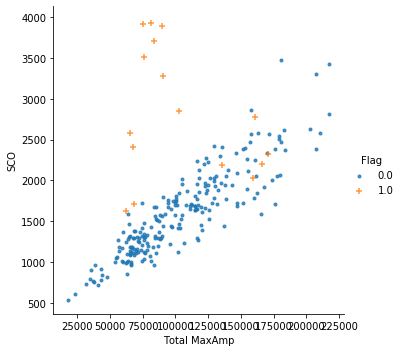

In [6]:
sn.lmplot('Total MaxAmp', 'SCO', data=predictedsignalDataFrame, hue="Flag", fit_reg=False, markers=['.','+'])

Confusion matrix, without normalization
[[216  15]
 [  8   1]]


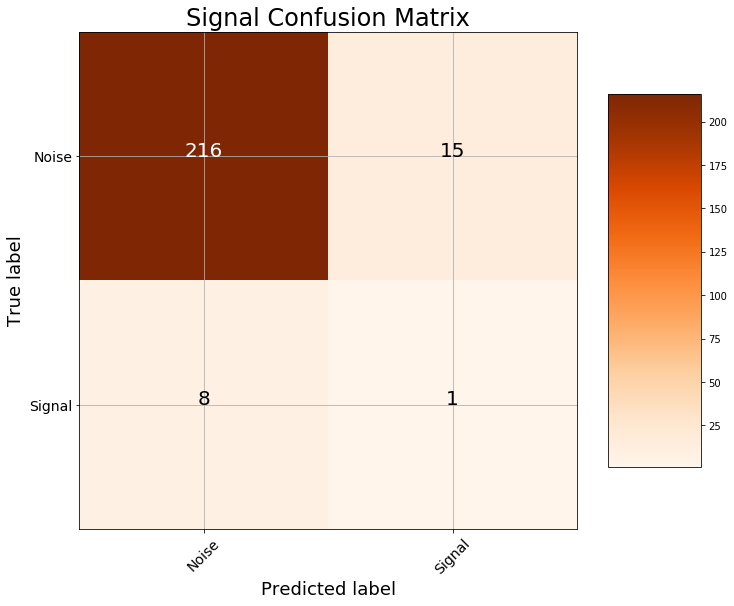

In [7]:
cm = sigp.confusion_matrix(signalDataFrame['Flag'], predictedsignalDataFrame['Flag'])
sigp.plot_confusion_matrix(cm, classes = ['Noise', 'Signal'], title = 'Signal Confusion Matrix')

In [8]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, classification_report
# Summary of classification by RF
print('Random Forest Classifier\n',
      classification_report(signalDataFrame['Flag'], predictedsignalDataFrame['Flag'], target_names=['Noise', 'Signal']))

Random Forest Classifier
               precision    recall  f1-score   support

       Noise       0.96      0.94      0.95       231
      Signal       0.06      0.11      0.08         9

    accuracy                           0.90       240
   macro avg       0.51      0.52      0.51       240
weighted avg       0.93      0.90      0.92       240



In [9]:
# Loading wav files for spectrogramms
audiolist = sigp.load_list_of_wav(signalPath)
temp = audiolist
ppredictedsignalDataFrame = predictedsignalDataFrame.loc[predictedsignalDataFrame['Flag'] == 1]

In [10]:
sigp.plot_all_spectrogramms(audiolist, predictedsignalDataFrame, 1024, 0, 16, 0) # last param is activator , 1 - start, 0 - none

Signal amount is  16


In [11]:
audiolist[208].make_audio()